In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBClassifier
import xlrd

In [2]:
#import danych
loc = ("Desktop/Studia semestr 6/Data Mining/Jupyter/churn.xlsx")
data = pd.read_excel(loc).drop(['ID'], axis=1)

In [3]:
data.head()

,"Churn (1=yes, 0=No)",Profit,Age,Cancelled,Months since start,Way of payment,Promotion,Region,Profit segment,Sex,...,Revenue from calls (3 months ago),Fixed revenue (3 months ago),Revenue from roaming (3 months ago),Total revenue (3 months ago),Airtime to data service (1 month ago),Airtime incoming (1 month ago),Airtime to mobile (1 month ago),Calls to data service (3 months ago),Calls incoming (3 months ago),Calls roaming (3 months ago)
0,0,25.409096,21,0,14,Standing Order,0,0,D,Female,...,7.827187,0.00,0.0,7.827187,0.0,1105.413331,439.863154,0,75,0
1,1,572.107602,29,0,26,Standing Order,0,7,B,Male,...,436.528877,0.00,0.0,436.528877,0.0,54991.234822,44696.346418,0,199,3
2,0,57.456634,20,0,10,Standing Order,0,1,D,Female,...,69.884354,28.12,0.0,98.004354,0.0,684.385557,651.221462,0,54,0
3,1,292.595896,47,1,29,Standing Order,0,5,A,Male,...,419.516818,62.60,0.0,482.116818,0.0,12523.260237,4837.449854,0,134,0
4,0,6.599228,47,0,10,Standing Order,0,7,D,Male,...,12.092878,0.00,0.0,12.092878,0.0,2531.737199,73.926074,0,21,0


In [4]:
data.describe()

,"Churn (1=yes, 0=No)",Profit,Age,Cancelled,Months since start,Promotion,Tariff model,Academic title,Revenue from calls (3 months ago),Fixed revenue (3 months ago),Revenue from roaming (3 months ago),Total revenue (3 months ago),Airtime to data service (1 month ago),Airtime incoming (1 month ago),Airtime to mobile (1 month ago),Calls to data service (3 months ago),Calls incoming (3 months ago),Calls roaming (3 months ago)
count,11810.000000,11810.000000,11810.000000,11810.000000,11810.000000,11810.0,11810.000000,11810.000000,11810.000000,11810.000000,11810.000000,11810.000000,11810.000000,11810.000000,11810.000000,11810.0,11810.000000,11810.000000
mean,0.100000,101.098452,28.219306,0.020237,16.807790,0.0,10.215072,0.024555,51.729468,28.688493,8.611292,89.029253,0.087792,2918.518792,1137.365030,0.0,35.549958,0.611262
std,0.300013,209.927808,6.590383,0.140816,9.520886,0.0,5.606525,0.154772,105.807331,11.855100,45.855806,121.132813,3.023441,5246.237369,3272.294606,0.0,51.172809,2.939251
min,0.000000,0.000000,20.000000,0.000000,6.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,26.062782,24.000000,0.000000,10.000000,0.0,5.000000,0.000000,6.920331,28.120000,0.000000,36.048499,0.000000,155.317780,0.000000,0.0,4.000000,0.000000
50%,0.000000,61.802175,27.000000,0.000000,14.000000,0.0,8.000000,0.000000,21.319532,28.120000,0.000000,54.066947,0.000000,878.190495,147.513869,0.0,17.000000,0.000000
75%,0.000000,113.761592,31.000000,0.000000,22.000000,0.0,16.000000,0.000000,57.896985,30.710000,0.000000,100.208620,0.000000,3534.272460,911.889711,0.0,47.000000,0.000000
max,1.000000,11541.527297,50.000000,1.000000,71.000000,0.0,18.000000,1.000000,2843.420175,65.190000,990.817981,2874.130175,116.934334,64615.684971,56154.459996,0.0,643.000000,46.000000


In [5]:
data.isnull().sum()

Churn (1=yes, 0=No)                      0
Profit                                   0
Age                                      0
Cancelled                                0
Months since start                       0
Way of payment                           0
Promotion                                0
Region                                   0
Profit segment                           0
Sex                                      0
Tariff model                             0
Academic title                           0
Revenue from calls (3 months ago)        0
Fixed revenue (3 months ago)             0
Revenue from roaming (3 months ago)      0
Total revenue (3 months ago)             0
Airtime to data service (1 month ago)    0
Airtime incoming (1 month ago)           0
Airtime to mobile (1 month ago)          0
Calls to data service (3 months ago)     0
Calls incoming (3 months ago)            0
Calls roaming (3 months ago)             0
dtype: int64

In [6]:
data.Promotion.value_counts()

0    11810
Name: Promotion, dtype: int64

In [7]:
data.Region.value_counts()

5    1960
4    1420
7    1320
3    1300
8    1240
2    1070
6    1050
9    1000
1     850
0     580
F      20
Name: Region, dtype: int64

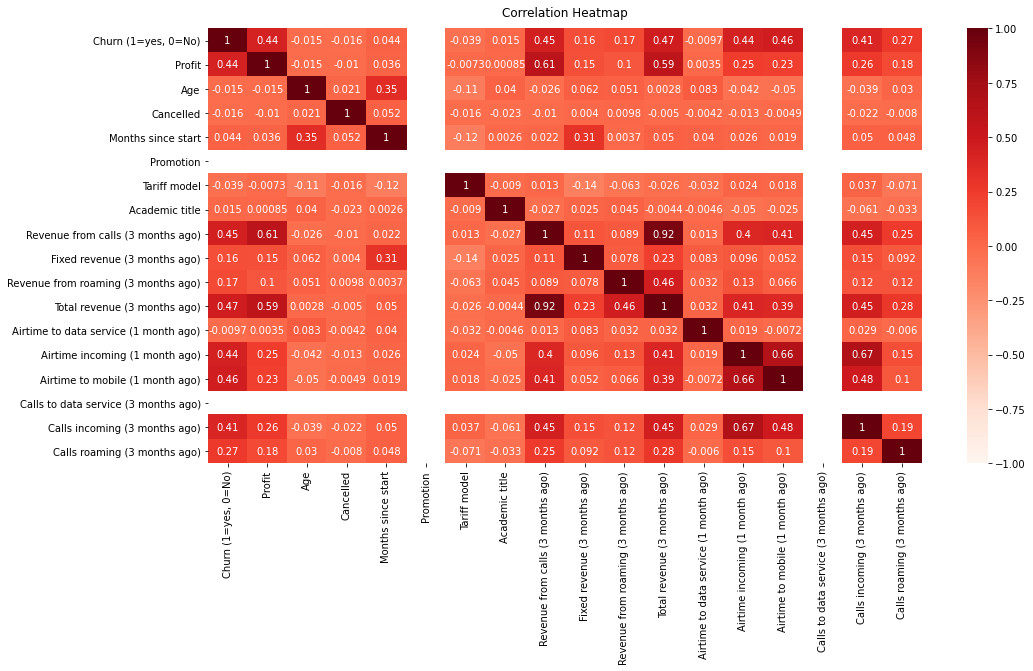

In [8]:
#Macierz korelacji

plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='Reds')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


In [9]:
#Należy usunąć zmienne Promotion i Calls to data service(3 months ago), ponieważ mają wysoki stopień korelacji
#Zmienna Promotion przyjmuje tylko wartości zerowe

data.drop('Promotion', axis=1, inplace=True)
data.drop('Calls to data service (3 months ago)', axis=1, inplace=True)

data.head()

,"Churn (1=yes, 0=No)",Profit,Age,Cancelled,Months since start,Way of payment,Region,Profit segment,Sex,Tariff model,Academic title,Revenue from calls (3 months ago),Fixed revenue (3 months ago),Revenue from roaming (3 months ago),Total revenue (3 months ago),Airtime to data service (1 month ago),Airtime incoming (1 month ago),Airtime to mobile (1 month ago),Calls incoming (3 months ago),Calls roaming (3 months ago)
0,0,25.409096,21,0,14,Standing Order,0,D,Female,5,0,7.827187,0.00,0.0,7.827187,0.0,1105.413331,439.863154,75,0
1,1,572.107602,29,0,26,Standing Order,7,B,Male,8,0,436.528877,0.00,0.0,436.528877,0.0,54991.234822,44696.346418,199,3
2,0,57.456634,20,0,10,Standing Order,1,D,Female,5,0,69.884354,28.12,0.0,98.004354,0.0,684.385557,651.221462,54,0
3,1,292.595896,47,1,29,Standing Order,5,A,Male,18,0,419.516818,62.60,0.0,482.116818,0.0,12523.260237,4837.449854,134,0
4,0,6.599228,47,0,10,Standing Order,7,D,Male,8,0,12.092878,0.00,0.0,12.092878,0.0,2531.737199,73.926074,21,0


In [10]:
(data.corr() >= 0.9).sum()

Churn (1=yes, 0=No)                      1
Profit                                   1
Age                                      1
Cancelled                                1
Months since start                       1
Tariff model                             1
Academic title                           1
Revenue from calls (3 months ago)        2
Fixed revenue (3 months ago)             1
Revenue from roaming (3 months ago)      1
Total revenue (3 months ago)             2
Airtime to data service (1 month ago)    1
Airtime incoming (1 month ago)           1
Airtime to mobile (1 month ago)          1
Calls incoming (3 months ago)            1
Calls roaming (3 months ago)             1
dtype: int64

In [11]:
#Usuwam zmienną Total Revenue, ponieważ poziom korelacji ze zmienną Revenue from calls jest większy niż 90%
data.drop('Total revenue (3 months ago)', axis = 1, inplace=True)

In [12]:
#Konwersja zmiennych Sex, Way of payment, Region na wartości nominalne
#Zmienną Profit segment zamieniam na skalę porządkową
data['Sex'] = pd.factorize(data['Sex'])[0]
data['Way of payment'] = pd.factorize(data['Way of payment'])[0]
data['Region'] = pd.factorize(data['Region'])[0]

def transformProfitSegment(row):
  
  if row['Profit segment'] == 'A':
    return 0
  elif row['Profit segment'] == 'B':
    return 1
  elif row['Profit segment'] == 'C':
    return 2
  elif row['Profit segment'] == 'D':
    return 3
  else:
    return 4
data['Profit segment'] = data.apply(lambda row: transformProfitSegment(row), axis=1)

In [13]:
data.Region.value_counts()

3     1960
5     1420
1     1320
6     1300
9     1240
7     1070
4     1050
8     1000
2      850
0      580
10      20
Name: Region, dtype: int64

In [14]:
data.head()

,"Churn (1=yes, 0=No)",Profit,Age,Cancelled,Months since start,Way of payment,Region,Profit segment,Sex,Tariff model,Academic title,Revenue from calls (3 months ago),Fixed revenue (3 months ago),Revenue from roaming (3 months ago),Airtime to data service (1 month ago),Airtime incoming (1 month ago),Airtime to mobile (1 month ago),Calls incoming (3 months ago),Calls roaming (3 months ago)
0,0,25.409096,21,0,14,0,0,3,0,5,0,7.827187,0.00,0.0,0.0,1105.413331,439.863154,75,0
1,1,572.107602,29,0,26,0,1,1,1,8,0,436.528877,0.00,0.0,0.0,54991.234822,44696.346418,199,3
2,0,57.456634,20,0,10,0,2,3,0,5,0,69.884354,28.12,0.0,0.0,684.385557,651.221462,54,0
3,1,292.595896,47,1,29,0,3,0,1,18,0,419.516818,62.60,0.0,0.0,12523.260237,4837.449854,134,0
4,0,6.599228,47,0,10,0,1,3,1,8,0,12.092878,0.00,0.0,0.0,2531.737199,73.926074,21,0


In [15]:
data.drop(['Profit'], axis = 1, inplace=True)
Y=data['Churn (1=yes, 0=No)']
data.drop(['Churn (1=yes, 0=No)'], axis = 1, inplace=True)
X=data

In [16]:
Y.head()

0    0
1    1
2    0
3    1
4    0
Name: Churn (1=yes, 0=No), dtype: int64

In [17]:
# Standaryzacja
standscaler = StandardScaler()
standscaler_data = standscaler.fit_transform(X)
st_data = pd.DataFrame(standscaler_data, columns = X.columns)
X=st_data
X.head()

,Age,Cancelled,Months since start,Way of payment,Region,Profit segment,Sex,Tariff model,Academic title,Revenue from calls (3 months ago),Fixed revenue (3 months ago),Revenue from roaming (3 months ago),Airtime to data service (1 month ago),Airtime incoming (1 month ago),Airtime to mobile (1 month ago),Calls incoming (3 months ago),Calls roaming (3 months ago)
0,-1.095477,-0.143719,-0.294921,-0.218895,-1.725240,0.330822,-1.777203,-0.930218,-0.158662,-0.414944,-2.420031,-0.187799,-0.029038,-0.345616,-0.213163,0.770951,-0.207974
1,0.118465,-0.143719,0.965519,-0.218895,-1.353771,-2.126418,0.562682,-0.395105,-0.158662,3.636947,-2.420031,-0.187799,-0.029038,9.926147,13.312012,3.194215,0.812737
2,-1.247219,-0.143719,-0.715068,-0.218895,-0.982301,0.330822,-1.777203,-0.930218,-0.158662,0.171592,-0.047955,-0.187799,-0.029038,-0.425872,-0.148570,0.360559,-0.207974
3,2.849833,6.958033,1.280629,-0.218895,-0.610832,-3.355038,0.562682,1.388607,-0.158662,3.476157,2.860620,-0.187799,-0.029038,1.830864,1.130779,1.923956,-0.207974
4,2.849833,-0.143719,-0.715068,-0.218895,-1.353771,0.330822,0.562682,-0.395105,-0.158662,-0.374627,-2.420031,-0.187799,-0.029038,-0.073729,-0.324996,-0.284342,-0.207974


In [18]:
#Dzielę dane na zbiór testowy i treningowy w proporcjach 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [19]:
# 2.Budowa modeli klasyfikacyjnych

In [20]:
# Las losowy
clf = RandomForestClassifier(n_estimators=100, random_state=1,criterion="gini",bootstrap=True, max_depth=10)

clf.fit(X_train, Y_train)
clf_predict = clf.predict(X_test)

print(classification_report(Y_test,clf_predict))
print("Accuracy:",metrics.accuracy_score(Y_test, clf_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2121
           1       0.98      0.70      0.82       241

    accuracy                           0.97      2362
   macro avg       0.97      0.85      0.90      2362
weighted avg       0.97      0.97      0.97      2362

Accuracy: 0.9682472480948349


In [21]:
# XGBboost
xgb = XGBClassifier( colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, n_estimators = 100,use_label_encoder=False,random_state=1,eval_metric='mlogloss')
xgb.fit(X_train,Y_train)
xgb_predict = xgb.predict(X_test)

print(classification_report(Y_test,xgb_predict))
print("Accuracy:",metrics.accuracy_score(Y_test, xgb_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2121
           1       0.95      0.88      0.91       241

    accuracy                           0.98      2362
   macro avg       0.97      0.94      0.95      2362
weighted avg       0.98      0.98      0.98      2362

Accuracy: 0.983065198983912


In [22]:
# Drzewo decyzyjne
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=10,random_state=1)
dtc.fit(X_train, Y_train)
dtc_predict = dtc.predict(X_test)

print(classification_report(Y_test,dtc_predict))
print("Accuracy:",metrics.accuracy_score(Y_test, dtc_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2121
           1       0.87      0.80      0.83       241

    accuracy                           0.97      2362
   macro avg       0.92      0.89      0.91      2362
weighted avg       0.97      0.97      0.97      2362

Accuracy: 0.9674005080440304


In [23]:
#  Sieć neuronowa
mlpc=MLPClassifier(hidden_layer_sizes=(150,100,50), activation = 'relu',solver='adam',random_state=1)
mlpc.fit(X_train, Y_train)
mlpc_predict = mlpc.predict(X_test)

print(classification_report(Y_test,mlpc_predict))
print("Accuracy:",metrics.accuracy_score(Y_test, mlpc_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2121
           1       0.95      0.93      0.94       241

    accuracy                           0.99      2362
   macro avg       0.97      0.96      0.97      2362
weighted avg       0.99      0.99      0.99      2362

Accuracy: 0.9877222692633362


Las losowy: 0.8499151930605034
XGBboost: 0.9390798593789432
Drzewo decyzyjne: 0.8935785398338293
Sieć neuronowa: 0.963740387079609


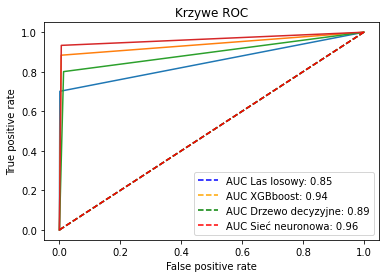

In [30]:
# 3) Porównanie wybranych modeli

models = [clf,xgb,dtc,mlpc]
models_predict=[clf_predict,xgb_predict,dtc_predict,mlpc_predict]
models_name=["Las losowy","XGBboost","Drzewo decyzyjne","Sieć neuronowa"]
colors=['blue', 'orange', 'green','red']

fig, ax = plt.subplots()
for i in range(len(models)):
    fpr, tpr, thresholds = roc_curve(Y_test,models_predict[i])
    auc = roc_auc_score(Y_test, models_predict[i])
    print(f'{models_name[i]}: {auc}')
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color=colors[i], linestyle='--', label=f'AUC {models_name[i]}: { str(round(auc, 2)) }')
    
plt.title('Krzywe ROC')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
plt.legend()